# Volume 1: K-Means Clustering.
    Jonathan Merrill
    Math 403
    November 30th, 2021

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import random
import numpy.linalg as la
import numpy as np
from imageio import imread
import random
from sklearn.cluster import KMeans

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [13]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        #raise NotImplementedError("Problem 1 Incomplete")
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        #choose n_clusters number of random rows (points) from X
        m,n = X.shape
        rows = random.sample(range(0,m-1),self.n_clusters)
        rows = X[rows]
        #set up an empty dictionary the length of n_clusters
        d = dict.fromkeys(np.arange(0,len(rows)))
        for i in range(len(rows)):
            d[i] = []
        #find the distances of each point to each of the cluster centers and add the point to the dictionary of the point that is closest
        for i in range(self.max_iter):
            for j in range(m):
                distances = []
                for k in rows:
                    distances.append(la.norm(X[j] - k,self.p))
                d[np.argmin(distances)].append(X[j])
            rows2 = rows.copy()
            rows = []
            #find the new cluster centers
            for l in range(len(d)):
                rows.append(sum(d[l])/len(d[l]))
            rows = np.array(rows)
            #keep finding cluster centers until consecutive centers are within convergence tolerance. 
            if la.norm(rows-rows2,self.p) < self.tol:
                break
        #return the clusters
        self.clusters = rows
        return self.clusters
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        l,n = X.shape
        d = []
        #find the distances to each cluster center
        for i in range(l):
            distances = []
            for j in range(len(self.clusters)):
                distances.append(la.norm(X[i] - self.clusters[j],self.p))
            #add the closest cluster center to a list and then return that list once all values have been cycled through
            d.append(np.argmin(distances))
        return d
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)

In [5]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

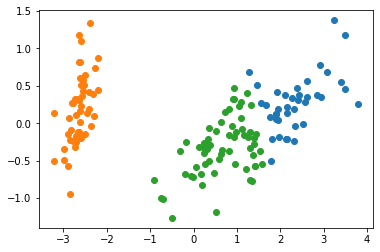

In [201]:
K = KMeans(n_clusters = 3)
#find the clusters
clusters = K.fit(iris_data)
#find the list where each index is which cluster each point is closest to
predict = K.predict(iris_data)
predict = np.array(predict)
for j in range(len(set(predict))):
    #create a mask for each different cluster center
    mask = predict==j
    #plot all the points in that mask (that are closest to that cluster center)
    plot = iris_data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o')
        

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

In [14]:
data = np.load('sacramento.npy')
#print(data[:,6])
data = data[:,[6,7]]

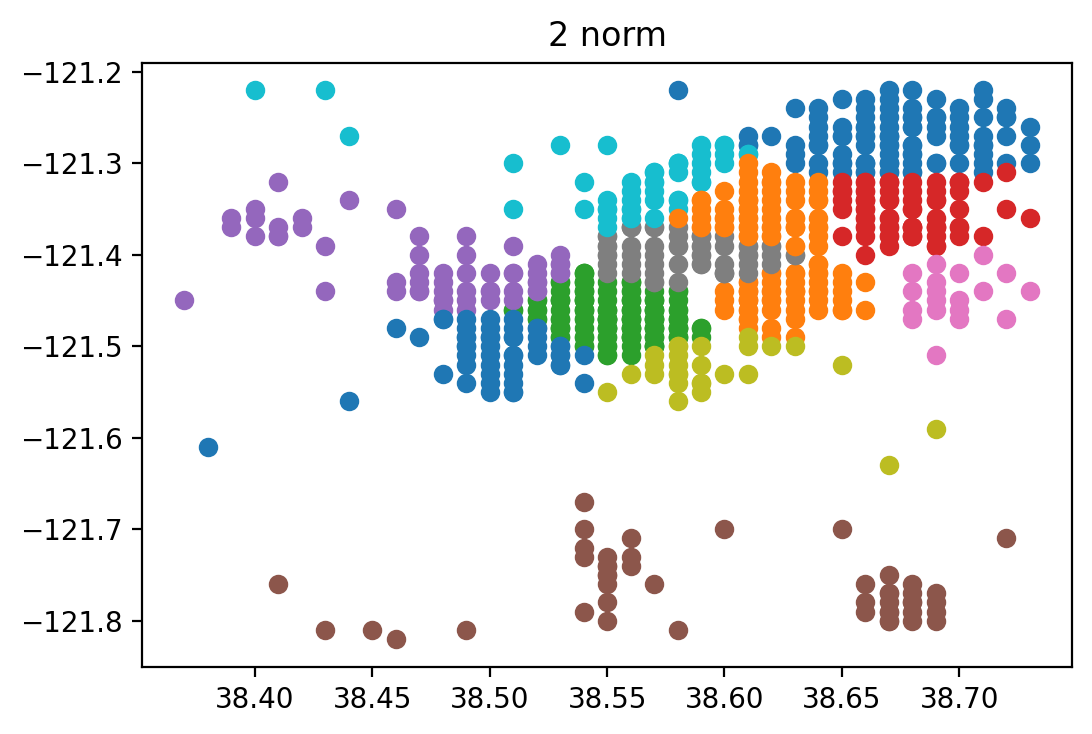

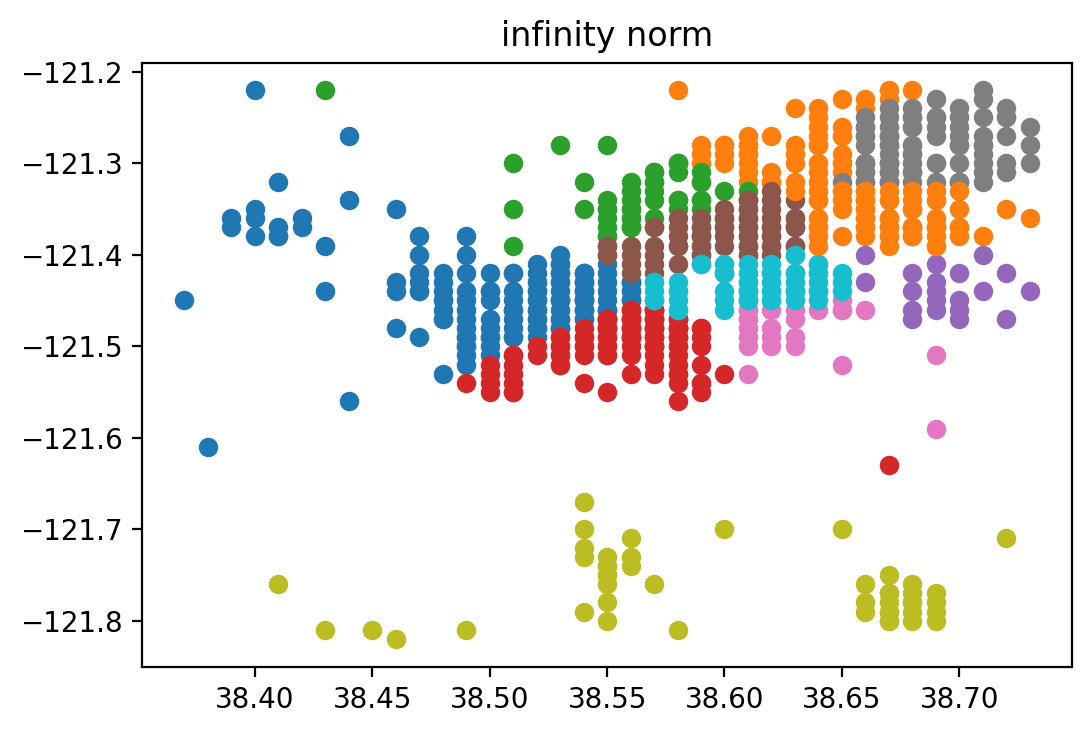

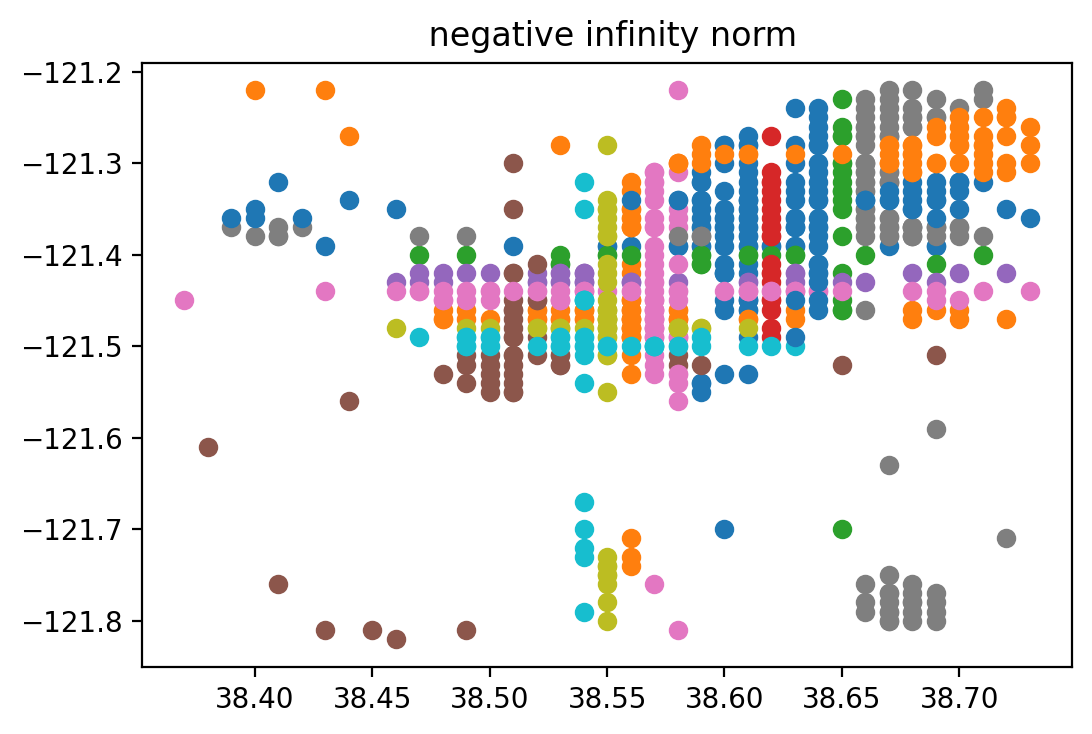

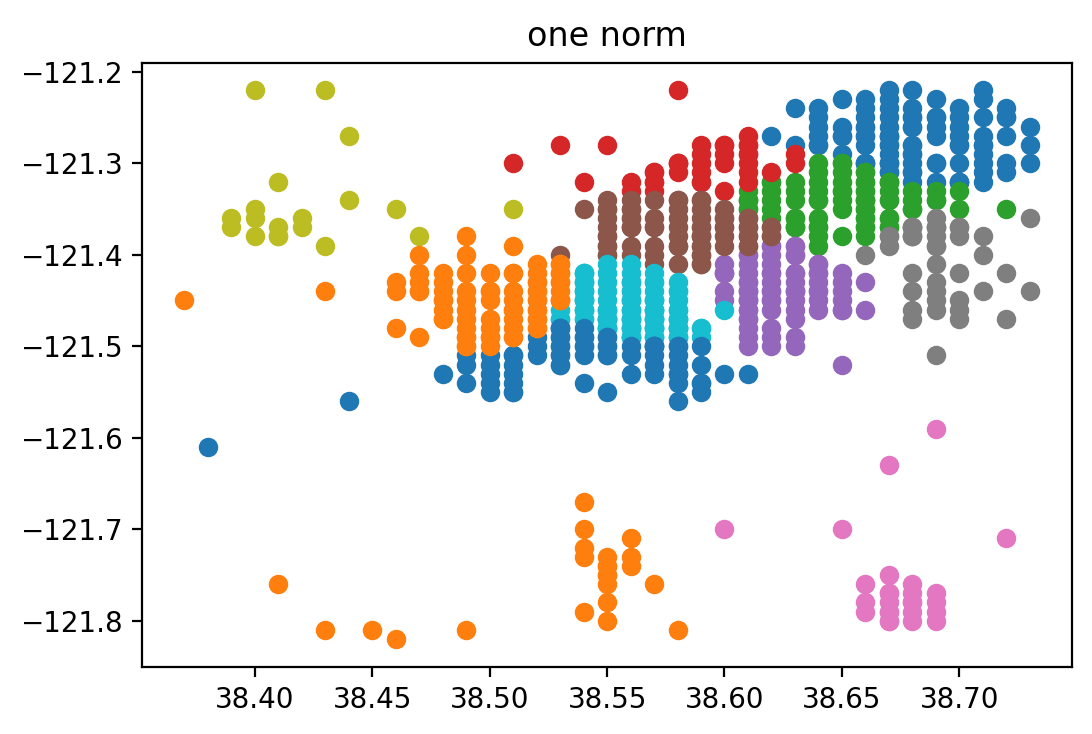

In [16]:
#2 norm
K = KMeans(n_clusters = 12)
#find the cluster centers of the sacramento fire data
clusters = K.fit(data)
#find the array for which points are closest to which centers
predict = K.predict(data)
predict = np.array(predict)
for j in range(len(set(predict))):
    #create a mask for each cluster center and plot the points from that mask in the same color as their center
    mask = predict==j
    plot = data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o')
plt.title('2 norm')
plt.show()

#infinity norm
K = KMeans(n_clusters = 12, p = np.inf)
clusters = K.fit(data)
predict = K.predict(data)
predict = np.array(predict)
for j in range(len(set(predict))):
    mask = predict==j
    plot = data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o')
plt.title('infinity norm')
plt.show()

#negative infinity norm
K = KMeans(n_clusters = 12, p = -np.inf)
clusters = K.fit(data)
predict = K.predict(data)
predict = np.array(predict)
for j in range(len(set(predict))):
    mask = predict==j
    plot = data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o')
plt.title(' negative infinity norm')
plt.show()

#one norm
K = KMeans(n_clusters = 12, p = 1)
clusters = K.fit(data)
predict = K.predict(data)
predict = np.array(predict)
for j in range(len(set(predict))):
    mask = predict==j
    plot = data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o')
plt.title('one norm')
plt.show()

Give your explaination here:
I found that the inifity norm was the best at keeping the maximum distance small (over many trials), and the negative infinity norm was the worst at keeping the maximum distance small. 

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

In [34]:
#load the earthquake data
data = np.load('earthquake_coordinates.npy')
long = data[:,0]
lat = data[:,1]

#convert to spherical
theta = (np.pi/180)*long
phi = (np.pi/180)*(90-lat)
r = 1
#convert to Euclidean
x = []
y = []
z = []
for i in range(len(long)):
    x.append(r*np.sin(phi[i])*np.cos(theta[i]))
    y.append(r*np.sin(phi[i])*np.sin(theta[i]))
    z.append(r*np.cos(phi[i]))
data1 = [x,y,z]
data1 = np.array(data1).T

In [35]:
K = KMeans(n_clusters = 15)
#find the cluster centers
clusters = K.fit(data1)
#find the array of which cluster center each point is closest to
predict = K.predict(data1)
predict = np.array(predict)

(15, 3)


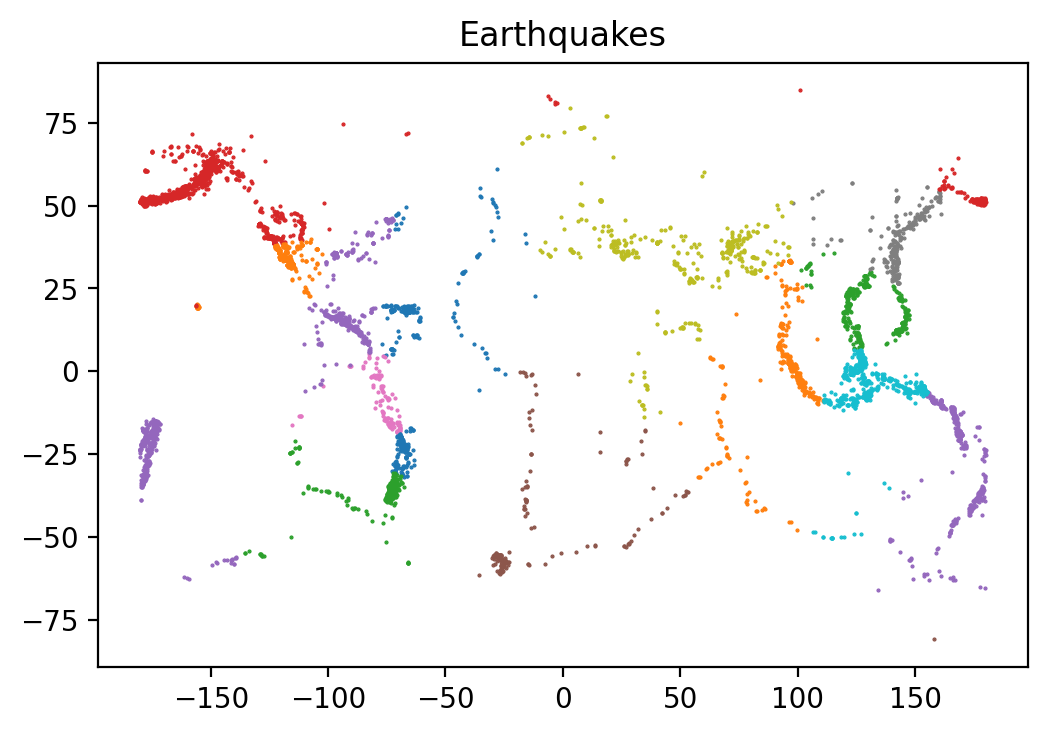

In [36]:
means = clusters
print(means.shape)
#seperate the 3 layers
x = means[:,0]
y = means[:,1]
z = means[:,2]
r = []
phi = []
theta = []
#transform to spherical
for i in range(len(x)):
    r.append(np.sqrt(x[i]**2 + y[i]**2 + z[i]**2))
    phi.append(np.arccos(z[i]/r[i]))
    theta.append(np.arctan2(y[i],x[i]))
theta = np.array(theta)
phi = np.array(phi)
#convert to euclidean
long = (theta/np.pi)*180
lat = 90 - (phi/np.pi)*180
data2 = [lat,long]
data2 = np.array(data2)
data2 = data2.T
#plot
for j in range(len(set(predict))):
    #create a mask for each cluster center and plot the points which are closest to each one
    mask = predict==j
    plot = data[mask]
    x = plot[:,0]
    y = plot[:,1]
    plt.plot(x,y,'o',markersize = .5)
plt.title('Earthquakes')
plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [253]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    m,n,l = im.shape
    #reshape so that each row is a pixel
    data = im.reshape(m*n,3)
    #find n_samples random samples
    rand = np.random.randint(0,m*n-1,n_samples)
    data2 = data[rand]
    
    #use scikit learn 
    K = KMeans(n_clusters = n_clusters)
    #find the clusters
    K.fit(data2)
    clusters = K.cluster_centers_
    #find the list where each index is which cluster each point is closest to
    predict = K.predict(data)
    predict = np.array(predict)
    #create an empty copy of our rows of pixels
    image = np.zeros_like(data)
    image = image.astype(np.float)
    for i in set(predict):
            for j in range(len(data[0])):
                #at each column for each number of n_clusters change the values of the row to be the same as their cluster centers
                mask = predict==i
                mask = 1*mask
                mask = clusters[i][j]*mask
                mask = np.array(mask).T
                image[:,j] += mask
    #reshape and return 
    image = image.reshape(m,n,l)
    return image
    #raise NotImplementedError("Problem 4 Incomplete")

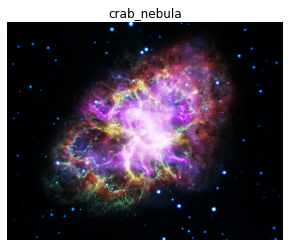

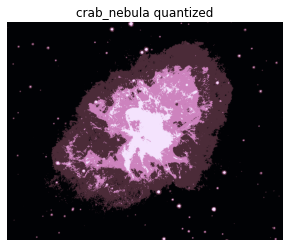

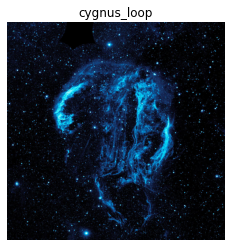

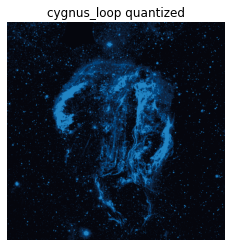

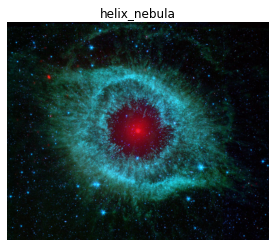

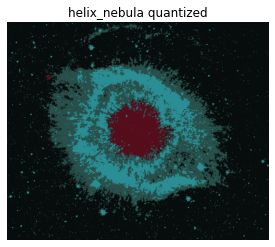

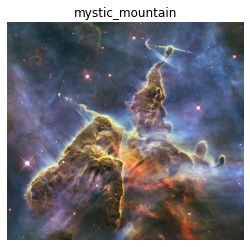

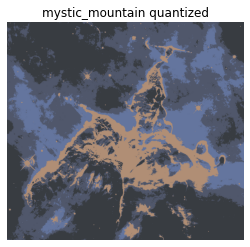

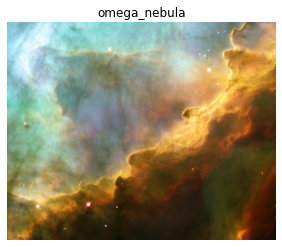

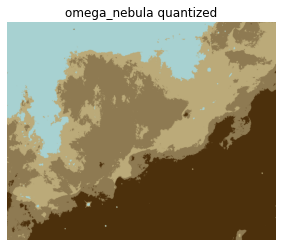

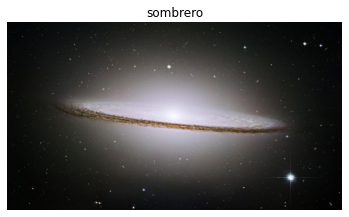

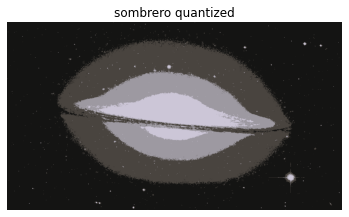

In [254]:
nasa = ['crab_nebula', 'cygnus_loop', 'helix_nebula', 'mystic_mountain', 'omega_nebula', 'sombrero']
#plot for each nasa image and each quantized image
for file in nasa:
    title = file
    file = file + '.jpg'
    im = imread(file)
    image = quantize_image(im)
    image = image.astype(int)
    plt.imshow(im)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    title = title + ' quantized'
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()